In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
import sklearn
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import math

In [4]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, cross_val_score

In [6]:
insurance_data.shape

(1338, 7)

In [7]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
insurance_data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [9]:
insurance_data = pd.get_dummies(insurance_data,columns=['sex'],drop_first=True)
insurance_data = pd.get_dummies(insurance_data,columns=['smoker'],drop_first=True)
insurance_data = pd.get_dummies(insurance_data,columns=['region'],drop_first=True)

In [10]:
insurance_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [11]:
train,test = train_test_split(insurance_data,test_size=0.2,random_state=20)

In [12]:
train.head

<bound method NDFrame.head of       age    bmi  children     charges  sex_male  smoker_yes  \
1204   18  27.28         3  18223.4512         0           1   
829    39  21.85         1   6117.4945         1           0   
1077   21  26.03         0   2102.2647         1           0   
416    52  34.10         0   9140.9510         1           0   
1295   20  22.00         1   1964.7800         1           0   
...   ...    ...       ...         ...       ...         ...   
1242   22  21.28         3   4296.2712         0           0   
924    43  23.20         0   6250.4350         1           0   
1247   33  29.40         4   6059.1730         1           0   
271    50  34.20         2  42856.8380         1           1   
474    54  25.10         3  25382.2970         1           1   

      region_northwest  region_southeast  region_southwest  
1204                 0                 1                 0  
829                  1                 0                 0  
1077              

In [13]:
train.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1204,18,27.28,3,18223.4512,0,1,0,1,0
829,39,21.85,1,6117.4945,1,0,1,0,0
1077,21,26.03,0,2102.2647,1,0,0,0,0
416,52,34.10,0,9140.9510,1,0,0,1,0
1295,20,22.00,1,1964.7800,1,0,0,0,1


In [14]:
train_y =  train['charges']
train_x = train.drop(['charges'],axis =1)

In [15]:
train_x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1204,18,27.28,3,0,1,0,1,0
829,39,21.85,1,1,0,1,0,0
1077,21,26.03,0,1,0,0,0,0
416,52,34.10,0,1,0,0,1,0
1295,20,22.00,1,1,0,0,0,1


In [16]:
train_y.head()

1204    18223.4512
829      6117.4945
1077     2102.2647
416      9140.9510
1295     1964.7800
Name: charges, dtype: float64

In [20]:
def plot_learning_curves(estimator, X, y, scoring="accuracy", cv=None, n_jobs=1, train_sizes=np.linspace(0.1,1.0,5)):
    plt.figure()
    plt.title("Learning Curves\n")
    plt.xlabel("Training examples")
    plt.ylabel("Score ({})".format(scoring))
    plt.legend(loc="best")
    plt.grid()

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")

    plt.plot(train_sizes, train_scores_mean, "o-", color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", 
            label="Cross-validation score")

    plt.show()

No handles with labels found to put in legend.


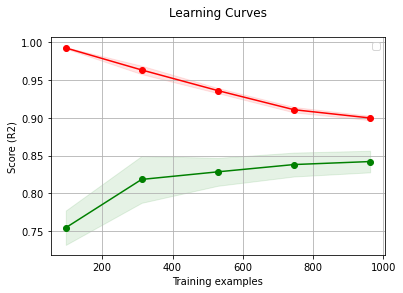

In [21]:
plot_learning_curves(GradientBoostingRegressor(), train_x, train_y, scoring="R2", cv=10, n_jobs=4)

In [22]:
GBM_model = GradientBoostingRegressor()

In [23]:
GBM_model.fit(train_x,train_y)

GradientBoostingRegressor()

In [25]:
test_y =  test['charges']
test_x = test.drop(['charges'],axis =1)

In [27]:
y_pred = GBM_model.predict(test_x)

In [29]:
rmse= np.sqrt(metrics.mean_squared_error(test_y, y_pred))

In [30]:
print(rmse)

3851.7818181770476


In [35]:
from sklearn.metrics import r2_score

In [41]:
#Adjusted RSquared of the model
score = r2_score(test_y,y_pred)
n=len(test) #number of records
p=len(test.columns)-1 
adjr= 1-(1-score)*(n-1)/(n-p-1)
print(adjr)

0.8982897317789937


In [42]:
import joblib

In [43]:
# save the model to disk
filename = 'GBM_model.joblib'
joblib.dump(GBM_model, filename)

['GBM_model.joblib']

In [47]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,1500],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_root_mean_squared_error',n_jobs=1,cv=5)

In [48]:
search.fit(train_x,train_y)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.5}

In [49]:
search.best_score_

-4737.84622430026

In [50]:
GBR=GradientBoostingRegressor(n_estimators=500,learning_rate=0.01,subsample=0.5,max_depth=2,random_state=1)

In [51]:
GBR.fit(train_x,train_y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=500,
                          random_state=1, subsample=0.5)

In [58]:
y_predict = GBR.predict(test_x)

In [59]:
rmse2= np.sqrt(metrics.mean_squared_error(test_y, y_predict))

In [60]:
print(rmse2)

3831.3921126583905


In [61]:
#Adjusted RSquared of the model
score = r2_score(test_y,y_predict)
n=len(test) #number of records
p=len(test.columns)-1 
adjr= 1-(1-score)*(n-1)/(n-p-1)
print(adjr)

0.8993637040298221


In [62]:
# save the model to disk
filename = 'GBR.joblib'
joblib.dump(GBR, filename)

['GBR.joblib']

In [63]:
filename = 'GBR.joblib'
loaded_model = joblib.load(filename)
result = loaded_model.score(test_x,test_y)
print(result)

0.9023790237592657
